Задание №1
--
Выполнила: Соболева Дарья 
--
Студентка 317 группы ВМК МГУ
--

In [1]:
import unittest
import sys
import numpy as np
from importlib import reload
from scipy.misc import imread
from scipy.spatial import distance
from scipy.stats import multivariate_normal
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
def run_tests(test_module):
    suite = unittest.TestLoader().loadTestsFromTestCase(test_module)
    unittest.TextTestRunner(verbosity=1,stream=sys.stderr).run(suite)

Задача №1: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы
 

Первым делом импортируем нужные модули:
* task1.py  -- Сами функции
* test_task1.py -- Тесты 


Краткое описание: тестируем крайние случаи на примере размера матрицы X (0darray, 1darray, 2darray), 
    
Замечание: полагаем, что у матрицы X есть на диагонали ненулевые элементы

In [3]:
from task1 import ProdNonZero
from test_task1 import TestProdNonZero
reload(sys.modules['task1'])
reload(sys.modules['test_task1'])

<module 'test_task1' from '/home/dasha/test_task1.py'>

Убедимся, что все тесты проработали верно

In [8]:
run_tests(TestProdNonZero)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.009s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант c np.diag
* вариант без векторизации
* вариант с частичной векторизацией

Попробуем сравнить скорость их работы на примере:
* Матрицы большого размера X.ndim = (1000, 500)
* Матрицы среднего размера X.ndim = (100,50)
* Матрицы маленького размера X.ndim = (4,3)

Для чистоты эксперимента, сгенерим случайную матрицу и осуществим несколько запусков наших функций (а именно 10000)

In [97]:
# Для построения графиков
alg_plt = {}

In [98]:
X = np.random.rand(1000, 500)
prod_non_zero = ProdNonZero()
x = %timeit -o -n 10000 prod_non_zero.vect_version(X) 
y = %timeit -o -n 10000 prod_non_zero.non_vect_version(X)
z = %timeit -o -n 10000 prod_non_zero.medium_version(X) 

10000 loops, best of 3: 11.4 µs per loop
10000 loops, best of 3: 279 µs per loop
10000 loops, best of 3: 165 µs per loop


In [100]:
alg_plt[X.size] = [x.best, y.best, z.best]

Убеждаемся, что векторизация на матрицах большого размера работает значительно быстрее

In [101]:
X = np.random.rand(100, 50)
prod_non_zero = ProdNonZero()
x = %timeit -o -n 10000 prod_non_zero.vect_version(X) 
y = %timeit -o -n 10000 prod_non_zero.non_vect_version(X)
z = %timeit -o -n 10000 prod_non_zero.medium_version(X)

10000 loops, best of 3: 6.63 µs per loop
10000 loops, best of 3: 29.4 µs per loop
10000 loops, best of 3: 21.3 µs per loop


In [102]:
alg_plt[X.size] = [x.best, y.best, z.best]

Заметим, что на матрицах среднего размера разрыв времени выполнения векторизации значительно уменьшился.

Но, продолжает лидировать векторизованный вариант!

In [103]:
X = np.random.rand(4, 3)
prod_non_zero = ProdNonZero()
x = %timeit -o -n 10000 prod_non_zero.vect_version(X) 
y = %timeit -o -n 10000 prod_non_zero.non_vect_version(X)
z = %timeit -o -n 10000 prod_non_zero.medium_version(X)

10000 loops, best of 3: 6.47 µs per loop
10000 loops, best of 3: 3.63 µs per loop
10000 loops, best of 3: 5.12 µs per loop


In [104]:
alg_plt[X.size] = [x.best, y.best, z.best]

Итак, мы видим, что на матрицах маленького размера, ускорения от векторизации не получаем.

Лидирурет полностью не векторизованный вариант

Время визуализировать результаты

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


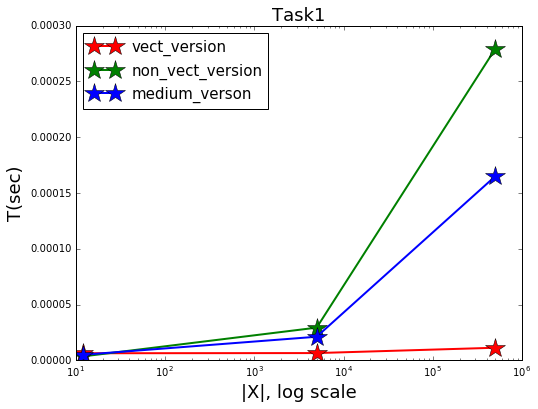

In [129]:
plt.figure(figsize=(8,6))
plt.gca().set_color_cycle(['red', 'green', 'blue'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.xscale('log')
plt.title('Task1', fontsize = 18)
plt.legend(['vect_version', 'non_vect_version', 'medium_verson'], loc = 'upper left', fontsize = 15)
plt.ylabel('T(sec)', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task1.eps', format = 'eps')
plt.show()


    
-----------------

Задача №2: Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]],
. . . , X[i[N-1], j[N-1]]])
    

Первым делом импортируем нужные модули:
* task2.py  -- Сами функции
* test_task2.py -- Тесты 

Краткое описание: тестируем крайние случаи на примере размера  векторов i и j (0darray, 1darray)
 
Замечание: полагаем, что матрица X имеет соответствующие индексы


In [2]:
from task2 import MatrixFromVectors
from test_task2 import TestMatrixFromVectors
reload(sys.modules['task2'])
reload(sys.modules['test_task2'])

<module 'test_task2' from '/home/dasha/task1_modules/test_task2.py'>

Убедимся, что все тесты проработали верно

In [5]:
run_tests(TestMatrixFromVectors)

..........
----------------------------------------------------------------------
Ran 10 tests in 0.015s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант c методом np.h_stack
* полностью векторизованный вариант c методом np.concat
* полностью векторизованный вариант c транспонированием
* полностью не векторизованный вариант
* самый быстрый и интуитивный вариант

Попробуем сравнить скорость их работы на примере:
* Векторы большого размера (X.ndim = (10000, 5000), i.ndim = 1000, j.ndim = 1000)
* Векторы среднего размера (X.ndim = (100,50), i.ndim = 10, j.ndim = 10)
* Векторы маленького размера (X.ndim = (4,3), i.ndim = 1, j.ndim = 1)

Для чистоты эксперимента, сгенерим случайную матрицу X и осуществим несколько запусков наших функций (а именно 100000)

In [6]:
# Для построения графиков
alg_plt = {}

In [7]:
X = np.random.rand(10000, 5000)
i = np.array(1000)
j = np.array(1000)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 616 ns per loop
100000 loops, best of 3: 613 ns per loop
100000 loops, best of 3: 617 ns per loop
100000 loops, best of 3: 669 ns per loop
100000 loops, best of 3: 398 ns per loop


In [8]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

Для матриц большого размера опять наблюдаем преимущества векторизованных способов

Метод h_stack и транспонирование сработали приблизительно одинаково, конкатенация немного опаздывает, но в целом, очень даже неплохо!

In [9]:
X = np.random.rand(100, 50)
i = np.array(10)
j = np.array(10)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 599 ns per loop
100000 loops, best of 3: 571 ns per loop
100000 loops, best of 3: 605 ns per loop
100000 loops, best of 3: 667 ns per loop
100000 loops, best of 3: 377 ns per loop


In [10]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

Конкатенация начала набирать свои позиции, векторизованные по-прежнему одерживают победу:)

In [11]:
X = np.random.rand(4, 3)
i = np.array(1)
j = np.array(1)
matrix_from_vectors = MatrixFromVectors()
x = %timeit -o -n 100000 matrix_from_vectors.vect_version_hstack(X, i, j) 
y = %timeit -o -n 100000 matrix_from_vectors.vect_version_transpose(X, i, j)
z = %timeit -o -n 100000 matrix_from_vectors.vect_version_concat(X, i, j)
g = %timeit -o -n 100000 matrix_from_vectors.non_vect_version(X, i, j)
f = %timeit -o -n 100000 matrix_from_vectors.fast_version(X, i, j)

100000 loops, best of 3: 994 ns per loop
100000 loops, best of 3: 571 ns per loop
100000 loops, best of 3: 574 ns per loop
100000 loops, best of 3: 660 ns per loop
100000 loops, best of 3: 379 ns per loop


In [12]:
alg_plt[X.size] = [x.best, y.best, z.best, g.best, f.best]

Итак, мы видим, что в данной задаче для векторов произвольного размера лучше использовать векторизованные методы:)

Время визуализировать результаты

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


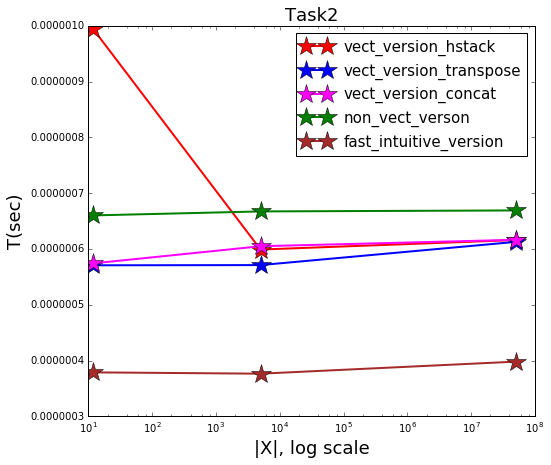

In [19]:
plt.figure(figsize=(8,7))
plt.gca().set_color_cycle(['red','blue', 'magenta', 'green', 'brown'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)+2):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.xscale('log')
plt.title('Task2', fontsize = 18)
plt.legend(['vect_version_hstack', 'vect_version_transpose', 'vect_version_concat',
            'non_vect_verson', 'fast_intuitive_version'],
           loc = 'best', fontsize = 15)
plt.ylabel('T(sec)', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task2.eps',  format = 'eps')
plt.show()

-----

Задача №3: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество

Первым делом импортируем нужные модули:
* task3.py  -- Сами функции
* test_task3.py -- Тесты 

Краткое описание: тестируем крайние случаи на примере размера  векторов x и y (1darray, 0darray)


In [38]:
from task3 import MultiSet
from test_task3 import TestMultiSet
reload(sys.modules['task3'])
reload(sys.modules['test_task3'])

<module 'test_task3' from '/home/dasha/task1/test_task3.py'>

Убедимся, что все тесты проработали верно

In [39]:
run_tests(TestMultiSet)

......
----------------------------------------------------------------------
Ran 6 tests in 0.006s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант c методом np.in1d
* метод, основанный на сравнении множеств (smart_version)
* полностью не векторизованный вариант


Попробуем сравнить скорость их работы на примере:
* Векторы большого размера (x.ndim==10000, y.ndim==10000)
* Векторы среднего размера (x.ndim==1000, y.ndim==5000)
* Векторы маленького размера (x.ndim==10, y.ndim==20)

Для чистоты эксперимента, сгенерим случайные векторы x и y, осуществим несколько запусков наших функций (а именно 100)

In [40]:
# Для построения графиков
alg_plt = {}

In [41]:
# Большие векторы, так что циклов возьмем поменьше
x = np.random.rand(10000)
y = np.random.rand(10000)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 1.29 ms per loop
100 loops, best of 3: 1.38 ms per loop
100 loops, best of 3: 3.35 ms per loop


In [42]:
alg_plt[x.size] = [a.best, b.best, c.best]

Вот это да! Классический пример того, как же все-таки векторизация упрощает нам жизнь!
Попробуем посмотреть, что будет дальше...

In [43]:
x = np.random.rand(1000)
y = np.random.rand(5000)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 377 µs per loop
100 loops, best of 3: 437 µs per loop
100 loops, best of 3: 904 µs per loop


In [44]:
alg_plt[x.size] = [a.best, b.best, c.best]

И финальный аккорд...

In [45]:
x = np.random.rand(10)
y = np.random.rand(20)
multiset = MultiSet()
a = %timeit -o -n 100 multiset.vect_version(x, y) 
b = %timeit -o -n 100 multiset.another_vect_version(x, y)
c = %timeit -o -n 100 multiset.non_vect_version(x, y)

100 loops, best of 3: 23.4 µs per loop
100 loops, best of 3: 44.3 µs per loop
100 loops, best of 3: 15.1 µs per loop


In [46]:
alg_plt[x.size] = [a.best, b.best, c.best]

Немного подвел, но это было ожидаемо. 

Краткие выводы: продолжай векторизовать!!!

Время визуализировать результаты

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


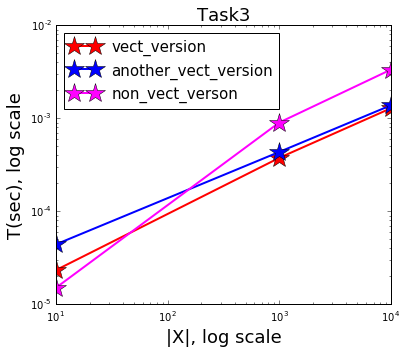

In [47]:
plt.figure(figsize=(6,5))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task3', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'another_vect_version', 'non_vect_verson'],
           loc = 'best', fontsize = 15)

plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task3.eps', format = 'eps')
plt.show()

-----------

Задача №4: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой

Первым делом импортируем нужные модули:
* task4.py  -- Сами функции
* test_task4.py -- Тесты 

Краткое описание: считаем, что на вход нам подаются именно 1darray, так что тестируемся именно на них, рассмотрим также нулевой вектор
    
Замечание: полагаем, что нулевые элементы присутствуют, а также не являются последними элементами в векторе

In [48]:
from task4 import MaxAfterZero
from test_task4 import TestMaxAfterZero
reload(sys.modules['task4'])
reload(sys.modules['test_task4'])

<module 'test_task4' from '/home/dasha/task1/test_task4.py'>

Убедимся, что все тесты проработали верно

In [49]:
run_tests(TestMaxAfterZero)

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант c методом np.roll
* полностью не векторизованный вариант
* метод, использующий map-filter-reduce (smart_version)


Попробуем сравнить скорость их работы на примере:
* Вектор большого размера (x.ndim==10000)
* Вектор среднего размера (x.ndim==1000)
* Вектор маленького размера (x.ndim==10)

Для чистоты эксперимента, сгенерим случайный вектор x, осуществим несколько запусков наших функций (а именно 10000)

In [195]:
# Для построения графиков
alg_plt = {}

In [196]:
x = np.random.rand(10000)
# обеспечим присутствие нулей
for i in range(0, 100, 10):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 44 µs per loop
10000 loops, best of 3: 4.16 ms per loop
10000 loops, best of 3: 2.56 ms per loop


In [197]:
alg_plt[x.size] = [a.best, b.best, c.best]

Про всю мощь векторизации я уже сказала.

Интересно, но наш "умный способ" оказался не столь эффективным, посмотрим, сможет ли он отвоевать свои позиции на пространстве меньшей размерности

In [198]:
x = np.random.rand(1000)
# обеспечим присутствие нулей
for i in range(0, 100, 10):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 14.5 µs per loop
10000 loops, best of 3: 404 µs per loop
10000 loops, best of 3: 274 µs per loop


In [199]:
alg_plt[x.size] = [a.best, b.best, c.best]

Призовые места распределяются в том же порядке...

In [200]:
x = np.random.rand(10)
# обеспечим присутствие нулей
for i in range(0, 5, 2):
    x[i] = 0
max_after_zero = MaxAfterZero()
a = %timeit -o -n 10000 max_after_zero.vect_version(x) 
b = %timeit -o -n 10000 max_after_zero.smart_version(x)
c = %timeit -o -n 10000 max_after_zero.non_vect_version(x)

10000 loops, best of 3: 10.2 µs per loop
10000 loops, best of 3: 6.06 µs per loop
10000 loops, best of 3: 11.3 µs per loop


In [201]:
alg_plt[x.size] = [a.best, b.best, c.best]

Утешительные апплодисменты "умному методу"!
Продолжаем векторизовать!

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


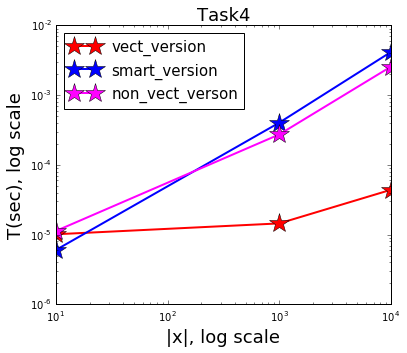

In [208]:
plt.figure(figsize=(6,5))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task4', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'smart_version', 'non_vect_verson'],
           loc = 'best', fontsize = 15)

plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|x|, log scale', fontsize = 18)
plt.savefig('task4.eps', format = 'eps')
plt.show()

------

Задача №5: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в
виде матрицы размера (height, width). 

Первым делом импортируем нужные модули:
* task5.py  -- Сами функции
* test_task5.py -- Тесты 

Краткое описание: тестируемся на бинарниках "src_img.npy" и  "res_img.npy" (сохраняли при помощи np.save).
    

Замечание: полагаем, что на вход были поданы матрица и вектор указанных размеров

In [210]:
from task5 import ConvertImage
from test_task5 import TestConvertImage
reload(sys.modules['task5'])
reload(sys.modules['test_task5'])

<module 'test_task5' from '/home/dasha/task1_prak/test_task5.py'>

Убедимся, что все тесты проработали верно

In [211]:
run_tests(TestConvertImage)

...
----------------------------------------------------------------------
Ran 3 tests in 0.545s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант, использующий подход numpy.broadcast
* полностью не векторизованный вариант 
* вариант с частичной векторизацией


Попробуем сравнить скорость их работы на примере:
* Большого изображение   (height = 1290, width = 1920)
* Среднего изображения   (height = 295,  width = 353)
* Маленького изображения (height = 108,  width = 72)

Для чистоты эксперимента осуществим несколько запусков наших функций 

Чтобы не скучать, будем рассматривать результаты, для этого нам понадобится библиотека matplotlib


In [ ]:
# Для построения графиков
alg_plt = {}

In [213]:
# Большая картинка, поэтому всего 5 запусков
src_img = imread('/home/dasha/task1_prak/sea.jpg', mode = 'RGB')
weights = np.array([0.299, 0.587, 0.114])
convert_image = ConvertImage()
a = %timeit -o -n 5 convert_image.vect_version(src_img, weights) 
b = %timeit -o -n 5 convert_image.medium_version(src_img, weights)
c = %timeit -o -n 5 convert_image.non_vect_version(src_img, weights)

5 loops, best of 3: 77.8 ms per loop
5 loops, best of 3: 36.8 ms per loop
5 loops, best of 3: 11.7 s per loop


In [219]:
alg_plt[src_img.size] = [a.best, b.best, c.best]

Лидирует частично векторизованный вариант, именно им и воспользуемся, чтобы увидеть результат

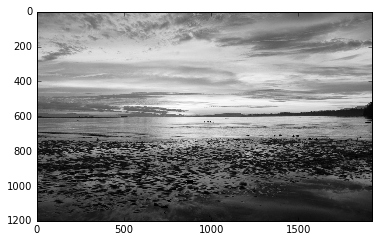

In [230]:
plt.imshow(convert_image.medium_version(src_img, weights), cmap='Greys_r')
plt.savefig('grey_sea.png')

Красота! переходим к следующей картинке...

In [222]:
src_img = imread('/home/dasha/task1_prak/river.bmp', mode = 'RGB')
weights = np.array([0.299, 0.587, 0.114])
convert_image = ConvertImage()
a = %timeit -o -n 5 convert_image.vect_version(src_img, weights) 
b = %timeit -o -n 5 convert_image.medium_version(src_img, weights)
c = %timeit -o -n 5 convert_image.non_vect_version(src_img, weights)

5 loops, best of 3: 3.22 ms per loop
5 loops, best of 3: 893 µs per loop
5 loops, best of 3: 533 ms per loop


In [224]:
alg_plt[src_img.size] = [a.best, b.best, c.best]

Лучше всех проработал комбинированный вариант, так что, воспользуемся именно им

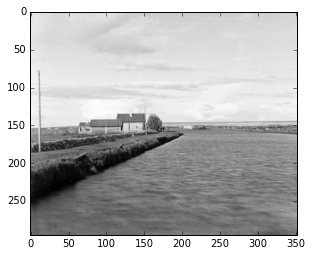

In [223]:
plt.imshow(convert_image.medium_version(src_img, weights), cmap='Greys_r')

И, наконец, последний образец

In [226]:
src_img = imread('/home/dasha/task1_prak/girl.jpg')
weights = np.array([0.299, 0.587, 0.114])
convert_image = ConvertImage()
a = %timeit -o -n 5 convert_image.vect_version(src_img, weights) 
b = %timeit -o -n 5 convert_image.medium_version(src_img, weights)
c = %timeit -o -n 5 convert_image.non_vect_version(src_img, weights)

5 loops, best of 3: 327 µs per loop
5 loops, best of 3: 77.1 µs per loop
5 loops, best of 3: 38.5 ms per loop


In [227]:
alg_plt[src_img.size] = [a.best, b.best, c.best]

Да, частично векторизованный вариант  справился неплохо

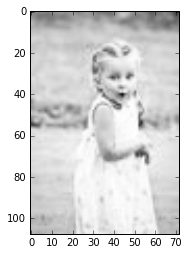

In [228]:
plt.imshow(convert_image.medium_version(src_img, weights), cmap='Greys_r')

Краткие выводы: победа достается частично векторизованному способу!


/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


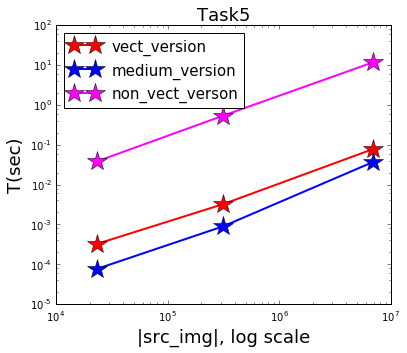

In [244]:
plt.figure(figsize=(6,5))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task5', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
#plt.yscale('log')
plt.legend(['vect_version', 'medium_version', 'non_vect_verson'],
           loc = 'best', fontsize = 15)
plt.ylabel('T(sec)', fontsize = 18)
plt.xlabel('|src_img|, log scale', fontsize = 18)
plt.savefig('task5.eps', format = 'eps')
plt.show()

------

Задача №6: Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из
двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.

Первым делом импортируем нужные модули:
* task6.py  -- Сами функции
* test_task6.py -- Тесты 

Краткое описание: тестируем крайние случаи на примере размера  вектора x (1darray, 0darray)
    
Замечание: считаем, что вектор не пустой и в нем нет констант  None

In [247]:
from task6 import RunLengthEncode
from test_task6 import TestRunLengthEncode
reload(sys.modules['task6'])
reload(sys.modules['test_task6'])

<module 'test_task6' from '/home/dasha/task1_prak/test_task6.py'>

Убедимся, что все тесты проработали верно

In [248]:
run_tests(TestRunLengthEncode)

......
----------------------------------------------------------------------
Ran 6 tests in 0.010s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант c методами np.flatnonzero, np.isclose, np.diff
* метод, использующий модуль groupby 
* полностью не векторизованный вариант


Попробуем сравнить скорость их работы на примере:
* Вектора большого размера   x.ndim==10000
* Вектора среднего размера   x.ndim==1000
* Вектора маленького размера x.ndim==10

Для чистоты эксперимента, сгенерим случайный вектор x, осуществим несколько запусков наших функций (а именно 1000)

In [256]:
# Для построения графиков
alg_plt = {}

In [255]:
x = np.random.rand(10000)
run_length_encode = RunLengthEncode()
a = %timeit -o -n 1000 run_length_encode.vect_version(x) 
b = %timeit -o -n 1000 run_length_encode.version_groupby(x)
c = %timeit -o -n 1000 run_length_encode.non_vect_version(x)

1000 loops, best of 3: 165 µs per loop
1000 loops, best of 3: 9.47 ms per loop
1000 loops, best of 3: 4.97 ms per loop


In [257]:
alg_plt[x.size] = [a.best, b.best, c.best]

И снова векторизованный метод на больших данных не оставлят никому шансов!

Полностью не векторизованный вариант и groupby справились примерно одинаково

In [258]:
x = np.random.rand(1000)
run_length_encode = RunLengthEncode()
a = %timeit -o -n 1000 run_length_encode.vect_version(x) 
b = %timeit -o -n 1000 run_length_encode.version_groupby(x)
c = %timeit -o -n 1000 run_length_encode.non_vect_version(x)

1000 loops, best of 3: 89.7 µs per loop
1000 loops, best of 3: 826 µs per loop
1000 loops, best of 3: 477 µs per loop


In [259]:
alg_plt[x.size] = [a.best, b.best, c.best]

Разница остается ощутимой, но разрыв все равно сокращается

In [260]:
x = np.random.rand(10)
run_length_encode = RunLengthEncode()
a = %timeit -o -n 1000 run_length_encode.vect_version(x) 
b = %timeit -o -n 1000 run_length_encode.version_groupby(x)
c = %timeit -o -n 1000 run_length_encode.non_vect_version(x)

1000 loops, best of 3: 72.5 µs per loop
1000 loops, best of 3: 12.3 µs per loop
1000 loops, best of 3: 8.31 µs per loop


In [261]:
alg_plt[x.size] = [a.best, b.best, c.best]

Да, на маленьких данных улучшения от векторизации не особо ощутимы, справедливо:)

Время визуализировать

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


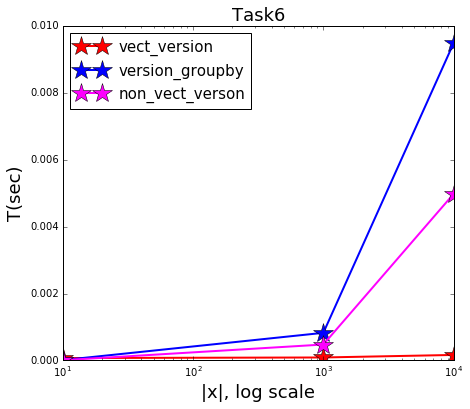

In [264]:
plt.figure(figsize=(7,6))
plt.gca().set_color_cycle(['red','blue', 'magenta'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task6', fontsize = 18)
plt.xscale('log')
#plt.yscale('log')
plt.legend(['vect_version', 'version_groupby', 'non_vect_verson'],
           loc = 'best', fontsize = 15)
plt.ylabel('T(sec)', fontsize = 18)
plt.xlabel('|x|, log scale', fontsize = 18)
plt.savefig('task6.eps', format = 'eps')
plt.show()

--------

Задача №7: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами.
    
Сравнить с функцией
scipy.spatial.distance.cdist

Первым делом импортируем нужные модули:
* task7.py  -- Сами функции
* test_task7.py -- Тесты 

Краткое описание: тестируем крайние случаи на примере размера  вектора x (0darray, 1darray, 2darray)
    
Замечание: полагаем, что X и Y имеют одинаковое число признаков

In [265]:
from task7 import EuclideanDist
from test_task7 import TestEuclideanDist
reload(sys.modules['task7'])
reload(sys.modules['test_task7'])

<module 'test_task7' from '/home/dasha/task1_prak/test_task7.py'>

Убедимся, что все тесты проработали верно

In [266]:
run_tests(TestEuclideanDist)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.641s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант, использующий подход numpy.broadcast
* метод, использующий scipy.distance.euclidean
* полностью не векторизованный вариант

Замечание: в виду ограничений по памяти, с размером выборок несильно получится поиграться

Попробуем сравнить скорость их работы на примере:
* Относительно больших выборок   X.shape==(10000, 5); Y.shape = (100, 5)
* Выборок среднего размера       X.shape==(1000, 5); Y.shape = (500, 5)
* Маленьких выборок              X.shape==(100, 5); Y.shape = (10, 5)

Для чистоты эксперимента, сгенерим случайные выборки X и Y, осуществим несколько запусков наших функций

In [286]:
# Для построения графиков
alg_plt = {}

In [287]:
X = np.random.rand(10000, 5)
Y = np.random.rand(100, 5)
euclidean_dist = EuclideanDist()
a = %timeit -o -n 2 euclidean_dist.vect_version(X, Y) 
b = %timeit -o -n 2 euclidean_dist.version_scipy(X, Y)
c = %timeit -o -n 2 euclidean_dist.non_vect_version(X, Y)

2 loops, best of 3: 66.1 ms per loop
2 loops, best of 3: 17.6 s per loop
2 loops, best of 3: 13.4 s per loop


Без векторизации, как известно, с большими выборками нам делать нечего!

Сравним с scipy.spatial.distance

In [288]:
scipy = %timeit -o -n 2 distance.cdist(X, Y) 

2 loops, best of 3: 12.1 ms per loop


Неплохо-неплохо, почти в 6 раз быстрее

In [289]:
alg_plt[X.size] = [a.best, b.best, c.best, scipy.best]

In [290]:
X = np.random.rand(1000, 5)
Y = np.random.rand(500, 5)
euclidean_dist = EuclideanDist()
a = %timeit -o -n 2 euclidean_dist.vect_version(X, Y) 
b = %timeit -o -n 2 euclidean_dist.version_scipy(X, Y)
c = %timeit -o -n 2 euclidean_dist.non_vect_version(X, Y)

2 loops, best of 3: 32.4 ms per loop
2 loops, best of 3: 8.93 s per loop
2 loops, best of 3: 6.66 s per loop


Заметно, что полностью не векторизованный способ справляется лучше библиотечной функции scipy.distance.euclidean

Сравним с scipy.spatial.distance

In [291]:
scipy = %timeit -o -n 2 distance.cdist(X, Y) 

2 loops, best of 3: 3.59 ms per loop


In [292]:
alg_plt[X.size] = [a.best, b.best, c.best, scipy.best]

In [293]:
X = np.random.rand(100, 5)
Y = np.random.rand(10, 5)
euclidean_dist = EuclideanDist()
a = %timeit -o -n 2 euclidean_dist.vect_version(X, Y) 
b = %timeit -o -n 2 euclidean_dist.version_scipy(X, Y)
c = %timeit -o -n 2 euclidean_dist.non_vect_version(X, Y)

2 loops, best of 3: 67.6 µs per loop
2 loops, best of 3: 17.6 ms per loop
2 loops, best of 3: 12.8 ms per loop


Сравним с scipy.spatial.distance


In [294]:
scipy = %timeit -o -n 2 distance.cdist(X, Y) 

2 loops, best of 3: 44.4 µs per loop


In [295]:
alg_plt[X.size] = [a.best, b.best, c.best, scipy.best]

При достаточно больших выборках лучше все-таки пользоваться библиотечной функцией scipy.spatial.distance

Время визуализировать

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


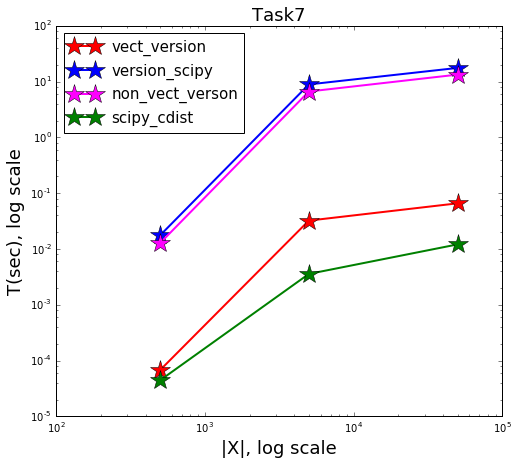

In [307]:
plt.figure(figsize=(8,7))
plt.gca().set_color_cycle(['red','blue', 'magenta', 'green'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)+1):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task7', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'version_scipy', 'non_vect_verson', 'scipy_cdist'],
           loc = 'upper left', fontsize = 15)
plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task7.eps', format = 'eps')
plt.show()

---

Задача №8: Реализовать функцию вычисления логарифма плотности многомерного нормального распределения
Входные параметры: точки X, размер (N, D), мат. ожидание m, вектор длины D, матрица ковари-
аций C, размер (D, D). Разрешается использовать библиотечные функции для подсчета определите-
ля матрицы, а также обратной матрицы, в том числе в невекторизованном варианте. Сравнить с
scipy.stats.multivariate_normal(m, C).logpdf(X)
как по скорости работы, так и по точности вычис-
лений.

Первым делом импортируем нужные модули:
* task8.py  -- Сами функции
* test_task8.py -- Тесты 

Краткое описание: можно рассматривать матрицу X как матрицу обьекты-признаки (N обьектов, D признаков).
Тестируем матрицу X с элементами, сгенерированными из равномерного распределения,в качестве мат. ожидания (mu) берем среднее значение каждого признака, в качестве ковариационной матрицы (С)  возьмем единичную.
    
Замечание: полагаем, что матрица C симметрична и положительно определена. Сравение с библиотечной функцией по эффективности осуществляем в ноутбуке, по точности вычислений на тестах

In [67]:
from task8 import MultiLogNormDensity
from test_task8 import TestMultiLogNormDensity
reload(sys.modules['task8'])
reload(sys.modules['test_task8'])

<module 'test_task8' from '/home/dasha/task1/test_task8.py'>

Убедимся, что все тесты проработали верно

In [68]:
run_tests(TestMultiLogNormDensity)

...
----------------------------------------------------------------------
Ran 3 tests in 0.030s

OK


Рассматриваются несколько вариантов кода различной эффективности:
* полностью векторизованный вариант
* еще один полностью векторизованный вариант (более естественный)
* полностью не векторизованный вариант

Замечание: в виду ограничений по памяти, с размером выборок несильно получится поиграться

Попробуем сравнить скорость их работы на примере:
* Относительно больших матриц   N = 10000; D = 100
* Матриц среднего размера       N = 1000;  D = 10
* Небольших матриц              N = 100;  D = 5

Для чистоты эксперимента, сгенерим случайную выборку X, осуществим несколько запусков наших функций (а именно 5)

In [79]:
# Свалились на переполнении
mu = 2*np.random.random_sample((300,)) - 1
Q = 2*np.random.random_sample((300, 300)) - 1
sigma = Q.T.dot(Q)
X = 2*np.random.random_sample((500, 300)) - 1

In [311]:
# Для построения графиков
alg_plt = {}

In [81]:
#X = np.random.rand(10000, 100)
#mu = np.mean(X, axis = 0)
#sigma = np.eye(100)
ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 7.31 ms per loop
5 loops, best of 3: 8.24 ms per loop
5 loops, best of 3: 14.3 s per loop


Более естественный способ все-таки проработал хуже, на то он и "более естественный"

Сравним работу с multivariate_normal.logpdf

In [80]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 16 ms per loop


In [314]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

Ого! А наш векторизованный способ не отстает!

Время любоваться картинками:)

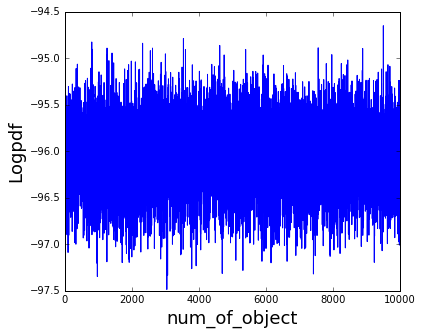

In [22]:
Y = ml_logpdf.vect_version() 
plt.figure(figsize=(6,5))
plt.plot(Y, color = 'blue', lw = 1)
plt.xlabel('num_of_object', fontsize = 18)
plt.ylabel('Logpdf', fontsize = 18)
plt.show()
#plt.savefig('logpdf1.png')

In [315]:
X = np.random.rand(1000, 10)
mu = np.mean(X, axis = 0)
sigma = np.eye(10)
ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 128 µs per loop
5 loops, best of 3: 3.12 ms per loop
5 loops, best of 3: 62.8 ms per loop


In [318]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 651 µs per loop


In [319]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

Мы все еще в топе!

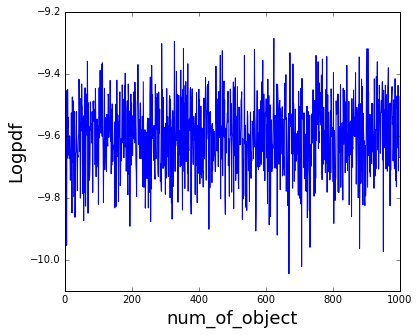

In [33]:
Y = ml_logpdf.vect_version() 
plt.figure(figsize=(6,5))
plt.plot(Y, color = 'blue', lw = 1)
plt.xlabel('num_of_object', fontsize = 18)
plt.ylabel('Logpdf', fontsize = 18)
plt.show()
#plt.savefig('logpdf2.png')

In [320]:
X = np.random.rand(100, 5)
mu = np.mean(X, axis = 0)
sigma = np.eye(5)
ml_logpdf = MultiLogNormDensity()
a = %timeit -o -n 5 ml_logpdf.vect_version(X, mu, sigma) 
b = %timeit -o -n 5 ml_logpdf.another_vect_version(X, mu, sigma)
c = %timeit -o -n 5 ml_logpdf.non_vect_version(X, mu, sigma)

5 loops, best of 3: 206 µs per loop
5 loops, best of 3: 195 µs per loop
5 loops, best of 3: 4.53 ms per loop


In [321]:
logpdf = %timeit -o -n 5 multivariate_normal(mu, sigma).logpdf(X)

5 loops, best of 3: 488 µs per loop


In [322]:
alg_plt[X.size] = [a.best, b.best, c.best, logpdf.best]

Честная победа достается нашему векторизованному способу

Замечание: усредняли по небольшому количеству итераций, поэтому могли получить не совсем адекватную оценку

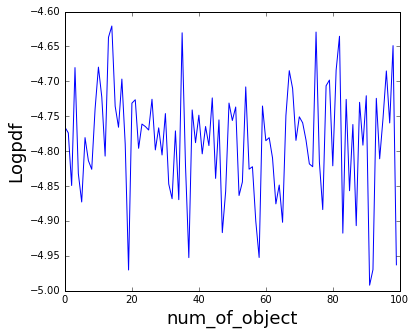

In [36]:
Y = ml_logpdf.vect_version() 
plt.figure(figsize=(6,5))
plt.plot(Y, color = 'blue', lw = 1)
plt.xlabel('num_of_object', fontsize = 18)
plt.ylabel('Logpdf', fontsize = 18)
plt.show()
#plt.savefig('logpdf3.png')

Время визуализировать 

/home/dasha/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


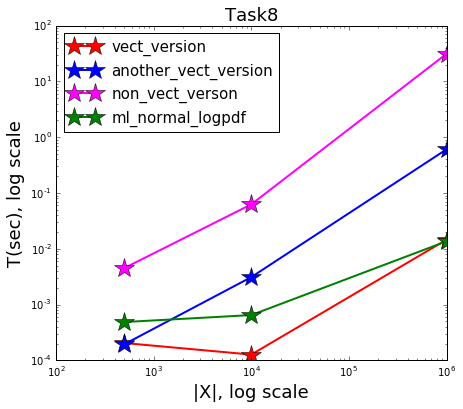

In [329]:
plt.figure(figsize=(7,6))
plt.gca().set_color_cycle(['red','blue', 'magenta', 'green'])
X_sizes = sorted(alg_plt.keys())
for i in range(len(X_sizes)+1):
    tmp = []
    for key, value in sorted(alg_plt.items()):
        tmp.append(alg_plt[key][i])
    plt.plot(X_sizes, tmp,  lw = 2, marker='*', markersize=20)
plt.title('Task8', fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(['vect_version', 'another_vect_version', 'non_vect_verson', 'ml_normal_logpdf'],
           loc = 'upper left', fontsize = 15)
plt.ylabel('T(sec), log scale', fontsize = 18)
plt.xlabel('|X|, log scale', fontsize = 18)
plt.savefig('task8.eps', format = 'eps')
plt.show()